## Briefly review 1D kernels for piecewise linear constraints
* before the 2D kernels show the 1D kernels first
* first, we can enforce separate rho_0 slopes for rho_0 across 1 using the piecewise linear kernel such as:
    * regular linear kernel: $ k(x,x') = 1 + xx'
    * absolute value kernel: $ k(x,x') = 1 + relu(xx') $
    * left abs value kernel: $ k(x,x') = 1 + relu(-x) * relu(-x') $
    * right abs value kernel: $ k(x,x') = 1 + relu(x) * relu(x') $

In [2]:
# 1D kernel plotting utility
import numpy as np, matplotlib.pyplot as plt

def plot_1d_kernel(kernel_func, nsamples=100):
    npts = 101
    blues = plt.cm.jet(np.linspace(0, 1, nsamples))
    xvec = np.linspace(-3.0, 3.0, npts)
    mean = np.zeros((npts,))
    cov = np.array([[kernel_func(xvec[i], xvec[j]) for i in range(npts)] for j in range(npts)])
    samples = np.random.multivariate_normal(mean, cov, size=nsamples)

    for isample, sample in enumerate(samples):
        plt.plot(xvec, sample, color=blues[isample], alpha=0.7, linewidth=2)
    plt.show()

unit_step = lambda x : 1.0 if x >= 0 else 0.0
relu = lambda x : x if x >= 0 else 0.0

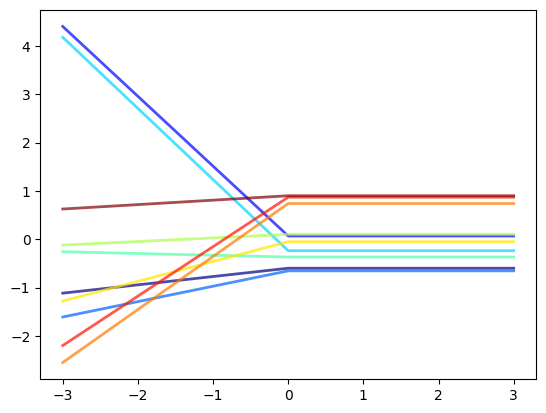

In [3]:
# 1D - piecewise about x = 0 linear kernel
piecewise0_kernel = lambda x, xp: 0.3 + relu(-x) * relu(-xp)
plot_1d_kernel(piecewise0_kernel, nsamples=10)

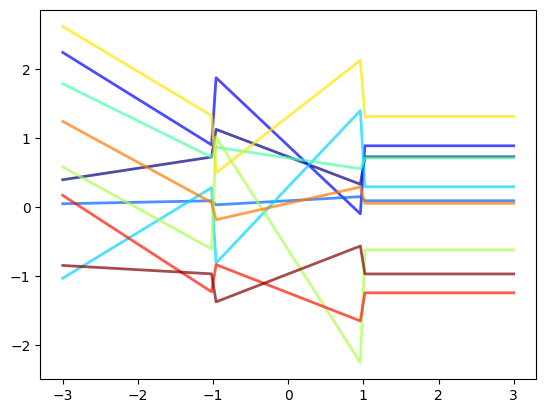

In [4]:
# 1D - piecewise about x = 0 linear kernel
piecewise3_kernel = lambda x, xp : 0.3 + 1.0 * relu(-x-1) * relu(-xp-1) + (x * xp) * (unit_step(x+1) - unit_step(x-1)) * (unit_step(xp+1) - unit_step(xp-1))
plot_1d_kernel(piecewise3_kernel, nsamples=10)
# need to correct it..

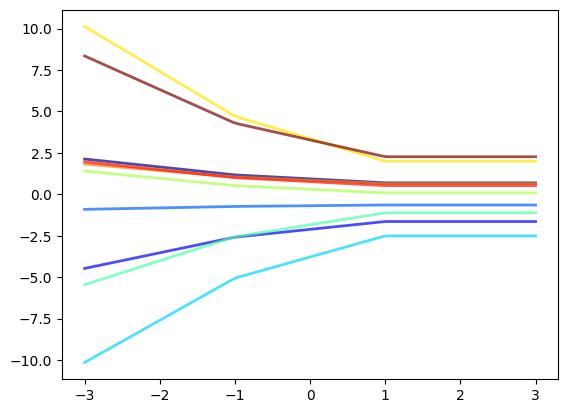

In [5]:
p = 1
basis = lambda x : (1 - p * x) * unit_step(-(x+1)) + 1 * unit_step(x-1) + (1 + p/2 * (1-x)) * (unit_step(x+1) - unit_step(x-1))
piecewise3_kernel = lambda x, xp : basis(x) * basis(xp) + 0.1
plot_1d_kernel(piecewise3_kernel, nsamples=10)

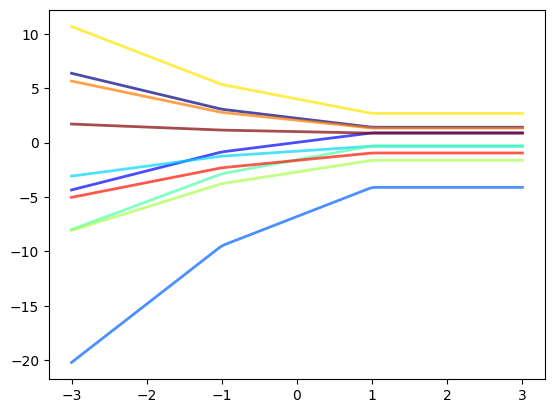

In [6]:
# p = 2 # slope = 2, does distribution change?
basis = lambda x,p : (1 - p * x) * unit_step(-(x+1)) + 1 * unit_step(x-1) + (1 + p/2 * (1-x)) * (unit_step(x+1) - unit_step(x-1))
piecewise3_kernel = lambda x, xp : basis(x,1) * basis(xp,1) + basis(x,2) * basis(xp,2) + 1.0
# need both basis functions, then can be linear combination of each
plot_1d_kernel(piecewise3_kernel, nsamples=10)

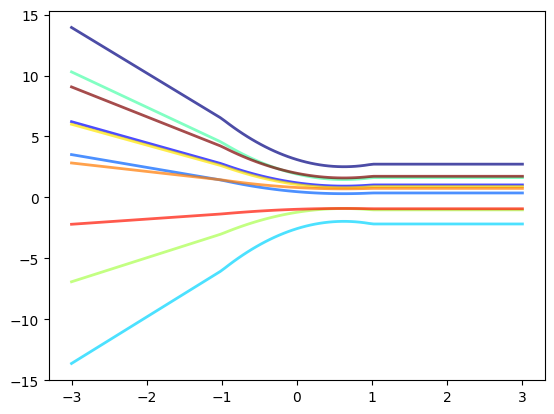

In [7]:
# now try quadratic one:
basis = lambda x,p,c : (1 - p * x) * unit_step(-(x+1)) + 1 * unit_step(x-1) + (1 + p/2 * (1-x) + c * (x**2 - 1)) * (unit_step(x+1) - unit_step(x-1))
piecewise3_kernel = lambda x, xp : basis(x,1,0.4) * basis(xp,1,0.4) + basis(x,2,0.8) * basis(xp, 2, 0.8)
plot_1d_kernel(piecewise3_kernel, nsamples=10)

/tmp/ipykernel_411226/2644931186.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, size=nsamples)


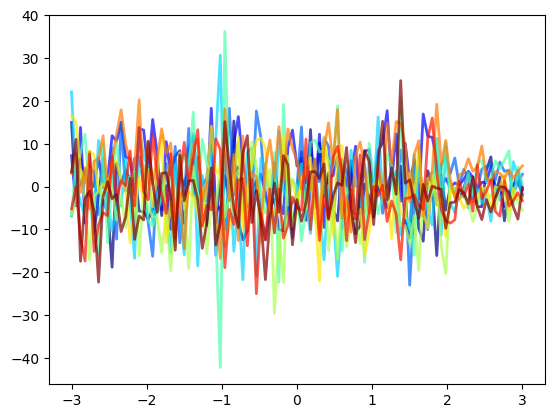

In [9]:
# series-based kernel function
def ks_kernel(x,xp):
    out = 1.0
    for n in range(1, 10+1):
        out += (-1)**(n+1) / n * (1.0 / (n*x+1) + 1.0 / (n * xp+1))
        for m in range(1, 10+1):
            out += (-1)**(m+n) / m / n / (1 + m * x + n * xp)
    return out

plot_1d_kernel(ks_kernel, nsamples=10)

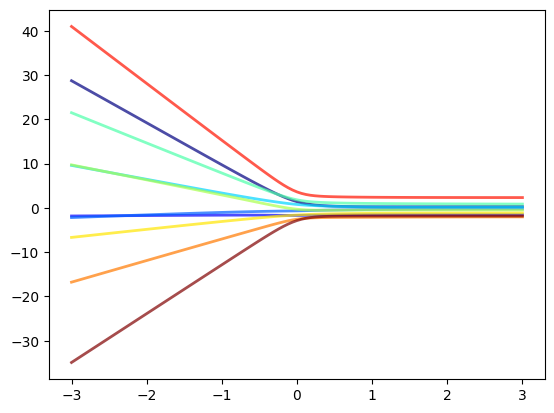

In [13]:
# ks-max basis, this is ks-max{1.0, 1 - px} = 1 + ks-max{0, -px} (the log-scale version)
basis = lambda x, p, ks : 1 + np.log(1.0 + np.exp(-p * ks * x)) / ks
ks_kernel2 = lambda x, xp : sum([basis(x, p, 1) * basis(xp, p, 1) for p in range(1, 10+1)]) / 10.0 + 1.0
plot_1d_kernel(ks_kernel2, nsamples=10)